<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/ANN_Image_Processig/Recycle_016_Image_All_Recycle_Images_same_file_to_Keras_gray_scale_jun_26_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
import random
import zipfile
from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/ucfilho/ANN_2021_01/
%cd ANN_2021_01

fatal: destination path 'ANN_2021_01' already exists and is not an empty directory.
/content/ANN_2021_01


In [3]:
# all images are load in variable x...
Arq =['cardboard.zip','glass.zip','metal.zip','not_recycle.zip',
      'paper.zip','plastic.zip']

img_name=[]
x_gray=[]
x_original = []
for FILE in Arq:
  file_name = zipfile.ZipFile(FILE, 'r')
  file_name.extractall()
  with zipfile.ZipFile(FILE, "r") as f:
      for name in f.namelist():
          img_name.append(name)
          #x_gray.append(cv2.imread(name, 0))
          x_gray.append(cv2.resize(cv2.imread(name, 0),(80,60)))

In [4]:
y_names = []
for yy in img_name:
  name = yy[0]+yy[1]+yy[2]
  y_names.append(name)

In [5]:
unique_list = []    
for yy in y_names:
  if yy not in unique_list:
    unique_list.append(yy)

In [6]:
n = len(unique_list)
y = []
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)

In [7]:
DATASET_SIZE = len(y_names)
Ind = range(DATASET_SIZE)
Img_Size = 60
num_range = DATASET_SIZE

In [8]:
Ind_train, Ind_test= train_test_split(Ind,test_size=0.20, shuffle=True, random_state=3)

In [9]:
X_train = []
Y_train = []
for II in Ind_train:
  name = img_name[II]
  X_train.append(cv2.resize(cv2.imread(name,0),(Img_Size,Img_Size)))
  Y_train.append(y[II])

In [10]:
X_test= []
Y_test = []
for II in Ind_test:
  name = img_name[II]
  X_test.append(cv2.resize(cv2.imread(name,0),(Img_Size,Img_Size)))
  Y_test.append(y[II])

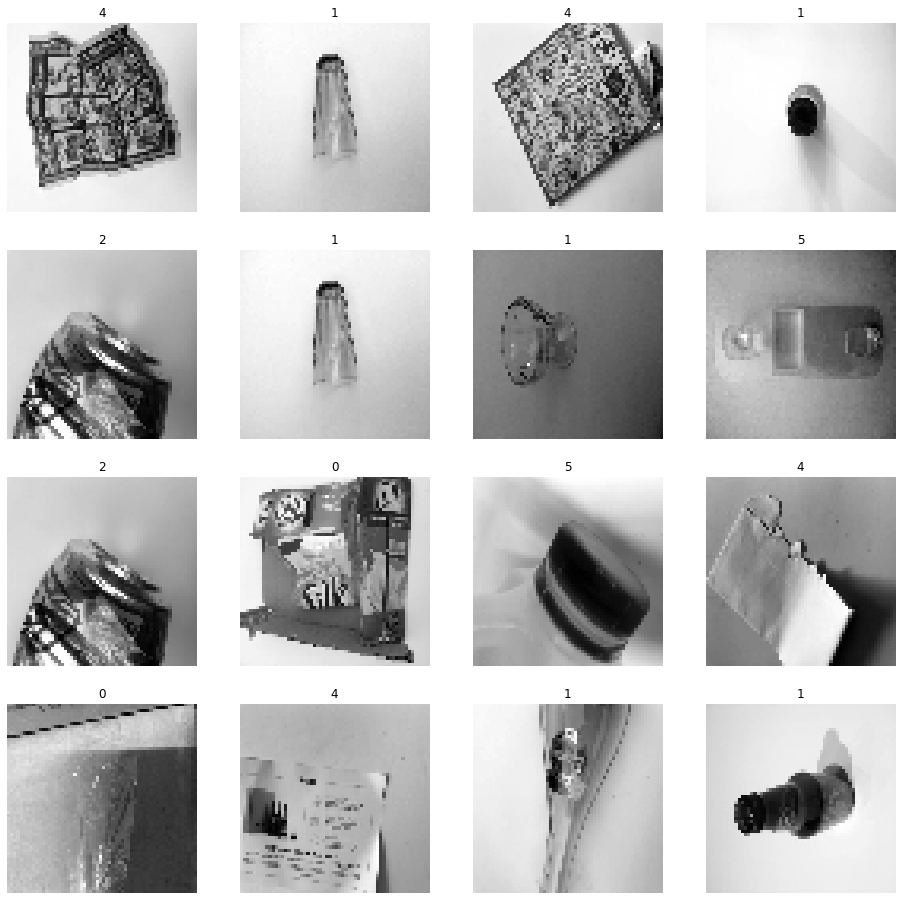

In [11]:
# view some images from the train_ds
num,cols = np.array(X_train[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  plt.imshow(X_train[kk], cmap='gray')
  plt.title(Y_train[kk])
  plt.axis("off")

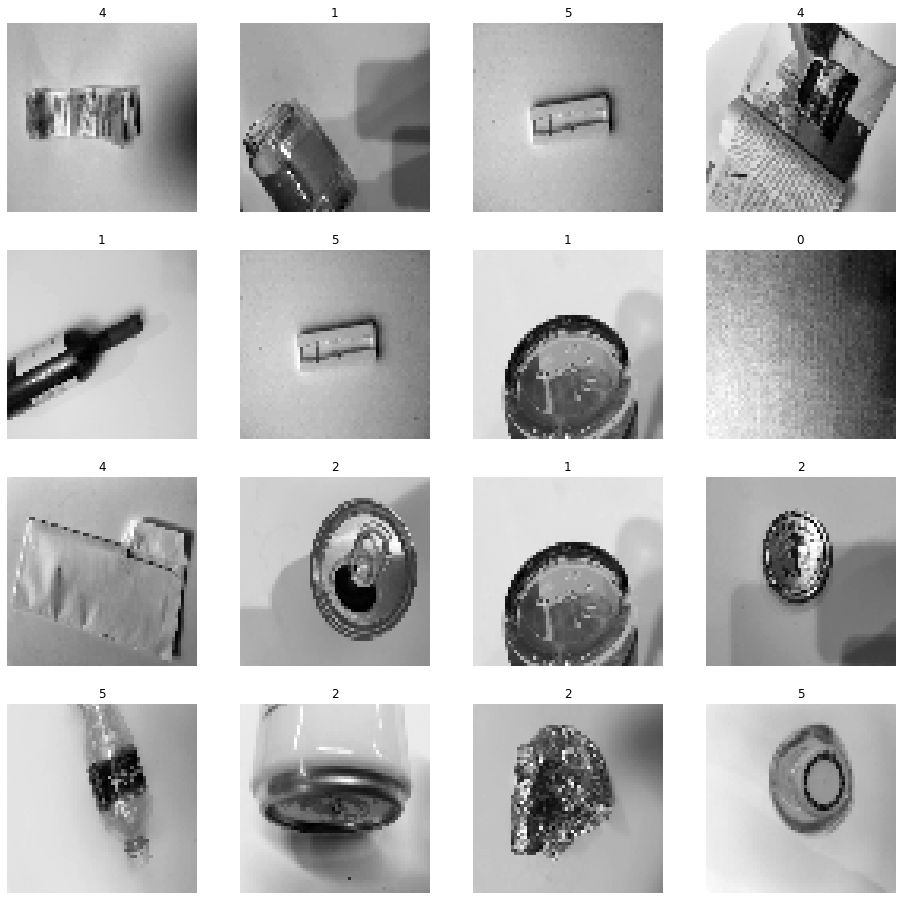

In [12]:
# view some images from the train_ds
num,cols = np.array(X_test[0]).shape
plt.figure(figsize=(16, 16))
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  kk = int(random.randrange(num))
  plt.imshow(X_test[kk], cmap='gray')
  plt.title(Y_test[kk])
  plt.axis("off")